### Classificação de digitos escritos a mão 

In [1]:
import tensorflow as tf 
import keras 
import matplotlib
import numpy as np 

In [19]:
from tensorflow.keras.datasets import mnist # importando o data set 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, kfold
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt 


In [3]:
# carregando a base de dados 
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [4]:
X_treinamento.shape, X_teste.shape # imagens como 28 por 28 pixels 

((60000, 28, 28), (10000, 28, 28))

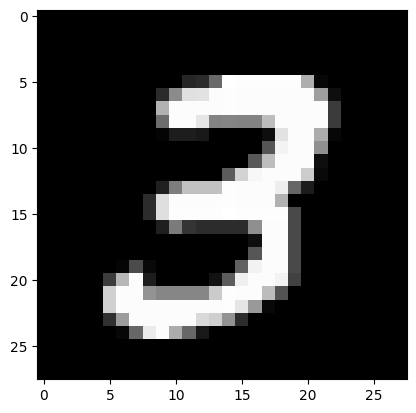

In [5]:
# visualizando imagens em escala de cinza
plt.imshow(X_treinamento[7], cmap='gray')

In [6]:
# realizando pré processamento para enviar a rede neural 
X_treinamento = X_treinamento.reshape(-1, 28, 28, 1)
X_teste = X_teste.reshape(-1, 28, 28, 1)

In [7]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
X_treinamento = X_treinamento.astype('float32') # convertendo para float 
X_treinamento /= 255 # diminuindo a escala dos dados
# Realizando o mesmo processo para os dados de teste 
X_teste = X_teste.astype('float32') 
X_teste /= 255


In [9]:
X_treinamento.max(), X_treinamento.min() # valores maximos e minimos 

(1.0, 0.0)

In [10]:
# one hot encoder 
y_treinamento = np_utils.to_categorical(y_treinamento)
y_teste = np_utils.to_categorical(y_teste)

y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [20]:
# criando a rede neural 
rede_neural = Sequential()

rede_neural.add(InputLayer(shape=(28, 28, 1))) # camada de entrada

# primeiro bloco 
rede_neural.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')) # camada de convolução 
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size = (2, 2))) # camada de maxpooling
# segundo bloco
rede_neural.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')) # camada de convolução 
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size = (2, 2))) # camada de maxpooling


rede_neural.add(Flatten()) # camada de flatten

rede_neural.add(Dense(units = 128, activation = 'relu'))# parte densa da rede 
rede_neural.add(Dropout(0.2)) # zera 20% dos 128 neuronios
rede_neural.add(Dense(units = 128, activation = 'relu'))# parte densa da rede 
rede_neural.add(Dropout(0.2)) # zera 20% dos 128 neuronios
rede_neural.add(Dense(units = 10, activation = 'softmax'))# camada de saida

In [21]:
rede_neural.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [22]:
# compilando a rede
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
# realizando o treinamento
rede_neural.fit(X_treinamento, y_treinamento, batch_size= 128, 
                epochs = 5, validation_data = (X_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8482 - loss: 0.4750 - val_accuracy: 0.9778 - val_loss: 0.0942
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9798 - loss: 0.0657 - val_accuracy: 0.9858 - val_loss: 0.0453
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9905 - val_loss: 0.0350
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9883 - loss: 0.0350 - val_accuracy: 0.9901 - val_loss: 0.0318
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9916 - loss: 0.0277 - val_accuracy: 0.9902 - val_loss: 0.0331


In [24]:
# avaliando o resultados 
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9888 - loss: 0.0408


In [25]:
resultado

[0.033135127276182175, 0.9901999831199646]

### validação cruzada 

In [34]:
from sklearn.model_selection import StratifiedKFold
seed = 5
np.random.seed(seed)
KFold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)

In [28]:
# carregamento da base 
(X, y), (X_teste, y_teste) = mnist.load_data()
X = X.reshape(X.shape[0], 28, 28, 1)
X = X.astype('float32')
X /= 255
y = np_utils.to_categorical(y, 10)

In [36]:
resultados = []
for indice_treinamento, indice_teste in KFold.split(X, np.zeros(shape = (y.shape[0], 1))):
    print("indices treinamento:", indice_treinamento, "Indice teste:", indice_teste)
    # criando a rede neural 
    classificador = Sequential()
    classificador.add(InputLayer(shape=(28, 28, 1))) # camada de entrada
    classificador.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')) # camada de convolução 
    classificador.add(MaxPooling2D(pool_size = (2, 2))) # camada de maxpooling
    classificador.add(Flatten()) # camada de flatten
    classificador.add(Dense(units = 128, activation = 'relu'))# parte densa da rede 
    classificador.add(Dense(units = 10, activation = 'softmax'))# camada de saida
    # compilando a rede
    classificador.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    classificador.fit(X[indice_treinamento], y[indice_treinamento], batch_size = 128, epochs = 5) # treinamento 
    # avaliando a rede 
    precisao = classificador.evaluate(X[indice_teste], y[indice_teste])
    resultados.append(precisao[1])

indices treinamento: [    0     1     2 ... 59997 59998 59999] Indice teste: [    5     7    10 ... 59983 59985 59993]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8589 - loss: 0.4814
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9743 - loss: 0.0875
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9856 - loss: 0.0508
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9891 - loss: 0.0368
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9924 - loss: 0.0267
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.0595
indices treinamento: [    1     2     5 ... 59995 59996 59999] Indice teste: [    0     3     4 ... 59989 59997 59998]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8481 - loss: 0.5169
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9759 - loss: 0.0882
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9846 - loss: 0.0530

In [38]:
np.array(resultados).mean() # media dos resultados 

0.9843500018119812

In [39]:
np.array(resultados).std() # desvio padrao dos resultados 

0.0011185403024159641

### aumento da quantidade de imagens 

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
# carregamento da base 
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [42]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')
X_treinamento /= 255
X_teste /= 255
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [ ]:
# criando a rede neural 
classificador = Sequential()
classificador.add(InputLayer(shape=(28, 28, 1))) # camada de entrada
classificador.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')) # camada de convolução 
classificador.add(MaxPooling2D(pool_size = (2, 2))) # camada de maxpooling
classificador.add(Flatten()) # camada de flatten
classificador.add(Dense(units = 128, activation = 'relu'))# parte densa da rede 
classificador.add(Dense(units = 10, activation = 'softmax'))# camada de saida
# compilando a rede
classificador.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7, horizontal_flip=True,
                                         shear_range=0.2, height_shift_range=0.07,
                                         zoom_range=0.2)

In [47]:
gerador_teste = ImageDataGenerator()

In [52]:
base_treinamento = gerador_treinamento.flow(X_treinamento, y_treinamento, batch_size = 128)

In [53]:
base_teste = gerador_teste.flow(X_teste, y_teste, batch_size = 128)

In [54]:
classificador.fit(base_treinamento, epochs=5, validation_data=base_teste)

Epoch 1/5
  3/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.0903 - loss: 2.8082  

d:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.1068 - loss: 2.3240 - val_accuracy: 0.9543 - val_loss: 0.1312
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.1115 - loss: 2.3014 - val_accuracy: 0.9530 - val_loss: 0.1340
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.1123 - loss: 2.3014 - val_accuracy: 0.9531 - val_loss: 0.1335
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.1128 - loss: 2.3013 - val_accuracy: 0.9527 - val_loss: 0.1354
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.1119 - loss: 2.3012 - val_accuracy: 0.9541 - val_loss: 0.1317
